# Pandas III

_May 14, 2020_

Agenda today:
- Statistics in Pandas 
- Groupby in Pandas
- Stacking & Unstacking

# Part I. Statistics in Pandas
Pandas allow us to calculate various summary statistics for the dataframe, such as mean, variance, and other descriptive statistics measurements. Let's see some examples. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [26]:
df.isnull().sum().sort_values(ascending=False)

continent                       23
total_litres_of_pure_alcohol     0
wine_servings                    0
spirit_servings                  0
beer_servings                    0
country                          0
dtype: int64

In [7]:
# calculate mean beer_servings
df.beer_servings.mean()

106.16062176165804

In [8]:
# calculate summary statistics for all measurements
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [22]:
#calculte the correltationbetween thse variables
corr = df.corr()

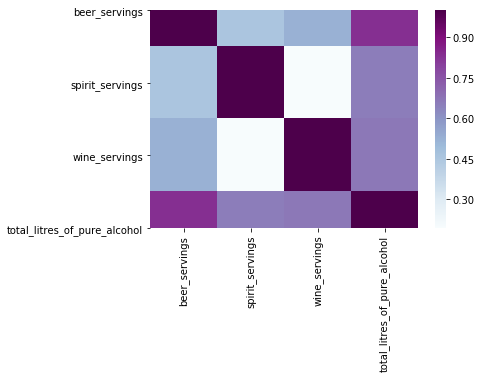

In [23]:
import seaborn as sns
sns.heatmap(corr, cmap="BuPu")

In [31]:
# how could we view summary statistics for categorical variable?
df.continent.value_counts(ascending = False)

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [44]:
# reviewing subsetting and selecting - select the countries on continent AF
df[df.continent == 'AF']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [54]:
# reviwing lambda - create a new column that indicates "low" if total_litres_of_pure_alcohol is below the mean, 
# and 'high' if above the mean

# df['high_or_low'] = df.total_litres_of_pure_alcohol.map(lambda total : 'High' if total > df.total_litres_of_pure_alcohol.mean() else 'Low')
df['high_or_low'] = ['High' if total > df.total_litres_of_pure_alcohol.mean() else 'Low' for total in df.total_litres_of_pure_alcohol]
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,high_or_low
0,Afghanistan,0,0,0,0.0,AS,Low
1,Albania,89,132,54,4.9,EU,High
2,Algeria,25,0,14,0.7,AF,Low
3,Andorra,245,138,312,12.4,EU,High
4,Angola,217,57,45,5.9,AF,High
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,High
189,Vietnam,111,2,1,2.0,AS,Low
190,Yemen,6,0,0,0.1,AS,Low
191,Zambia,32,19,4,2.5,AF,Low


## Part II. Pandas Groupby
Groupby methods in Pandas allow you to aggregate data and perform operations on them. The method can be summarized as split-apply-combine. The groupby function allow us to split the dataframe into _groups_, apply operations on them, and aggregate a final result. Let's look at some examples. 

In [27]:
# review summary statistics for each continent
df.groupby(['continent']).describe()


beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 spirit_servings                                             \
             max           count        mean        std   min    25%    50%   
continent                                                                     
AF         376.0            53.0   16.339623  28.102794   0.0   1.00    3.0   
AS         247.0            44.0   60.840909  84.362160   0.0   1.00   16.0   
EU         361.0            45.0  132.555556  77.589115   0.0  81.00  122.0   
OC         306.0            16.0   58.437500  70.504817   0.0  18.00   37.0   
SA         333.0            12.0  114.750000  77.077440  25.0  65.75  108.5   

                         wine_servings                                    \
              75%    max         count        mean        std  min   25%   
continent                                                                  
AF          19.00  152.0          53.0   16.264151  38.846419  0.0   1.0   
AS          98.00  326.0          44.0    9.068182  21.667034  0.0   0.0   
EU         173.00  373.0          45.0  142.222222  97.421738  0.0  59.0   
OC          65.25  254.0          16.0   35.625000  64.555790  0.0   1.0   
SA         148.75  302.0          12.0   62.416667  88.620189  1.0   3.0   

                                total_litres_of_pure_alcohol            \
             50%     75%    max                        count      mean   
continent                                                                
AF           2.0   13.00  233.0                         53.0  3.007547   
AS           1.0    8.00  123.0                         44.0  2.170455   
EU         128.0  195.00  370.0                         45.0  8.617778   
OC           8.5   23.25  212.0                         16.0  3.381250   
SA          12.0   98.50  221.0                         12.0  6.308333   

                                                     
                std  min   25%    50%     75%   max  
continent                                            
AF         2.647557  0.0  0.70   2.30   4.700   9.1  
AS         2.770239  0.0  0.10   1.20   2.425  11.5  
EU         3.358455  0.0  6.60  10.00  10.900  14.4  
OC         3.345688  0.0  1.00   1.75   6.150  10.4  
SA         1.531166  3.8  5.25   6.85   7.375   8.3

In [59]:
# only want sum for total_liters_of_pure_alcohol
df.groupby('continent').total_litres_of_pure_alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,3.007547,2.647557,0.0,0.70,2.30,4.700,9.1
AS,44.0,2.170455,2.770239,0.0,0.10,1.20,2.425,11.5
EU,45.0,8.617778,3.358455,0.0,6.60,10.00,10.900,14.4
OC,16.0,3.381250,3.345688,0.0,1.00,1.75,6.150,10.4
SA,12.0,6.308333,1.531166,3.8,5.25,6.85,7.375,8.3


Can you explain what the above code did?

In [28]:
# which continent drinks more beer on average?
EU

In [ ]:
# exercise - which continent drinks more beer than wine?
EU

In [61]:
# you can also groupby multiple columns - which will result in a hierarchical index. 

url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# and set the index as user_id
occupations = pd.read_csv(url, sep='|', index_col='user_id')

In [31]:
occupations.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [71]:
# calculate the mean age per occupation
occupations.groupby('occupation').age.mean().sort_values(ascending=True)

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [84]:
# for each combination of sex and occupation, show the mean age, assigned it to group by age
group_by_age = occupations.groupby(['occupation', 'gender']).age.mean()
group_by_age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [90]:
# exercise - for each occupation, calculate the percentage of female and sort it from high to low
occupations.groupby(['occupation']).gender.value_counts(normalize=True)[:, 'F'].sort_values(ascending = False)

occupation
homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
Name: gender, dtype: float64

## Part III. Stacking & Unstack
Stack and unstack in Pandas provide a way for us to easily manipulate the format of our dataframes. As we see above, the row index can have hierarchy - where one level of index is nested under another. This structure can happen for columns as well. If we want to manipulate the structure of rows and columns, we need to learn stack() and unstack().

**Stack()**

<img src = 'images/stack.png' width = 450>

**Unstack()**

<img src = 'images/unstack.png' width = 450>

What you you think is happening here?

In [91]:
# turn group by age from long to wide 
group_by_age.unstack('gender')

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [38]:
# play around with stacking and unstacking for the above datasets


#### Optional exercises & level up - the Adult dataset 

In [40]:
# read in the adults dataset 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = None

In [41]:
# create a column called income binary, 1 if income >50k 0 otherwise

In [42]:
# explore the racial distribution of income (you should use stack or unstack here)

# this show allows us to calculate the proportion of people who earned more than 50k by race

In [43]:
# explore the gender distribution of income (you should use stack or unstack here)

# this show allows us to calculate the proportion of people who earned more than 50k by gender

In [44]:
# strip the white space of the strings in the df